# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


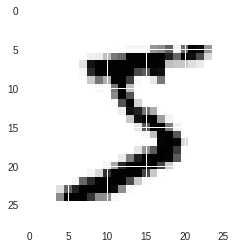

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

model.add(Convolution2D(32,3 ,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())


model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys


In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                46090     
Total params: 55,658
Trainable params: 55,658
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 39s 658us/step - loss: 0.1662 - acc: 0.9502
Epoch 2/10
15776/60000 [======>.......................] - ETA: 31s - loss: 0.0761 - acc: 0.9779

60000/60000 [==============================] - 40s 673us/step - loss: 0.0679 - acc: 0.9797
Epoch 3/10
28224/60000 [=============>................] - ETA: 20s - loss: 0.0510 - acc: 0.9839

60000/60000 [==============================] - 40s 665us/step - loss: 0.0500 - acc: 0.9843
Epoch 4/10
30144/60000 [==============>...............] - ETA: 21s - loss: 0.0402 - acc: 0.9872

60000/60000 [==============================] - 44s 730us/step - loss: 0.0397 - acc: 0.9875
Epoch 5/10
32800/60000 [===============>..............] - ETA: 18s - loss: 0.0314 - acc: 0.9898

60000/60000 [==============================] - 41s 691us/step - loss: 0.0320 - acc: 0.9897
Epoch 6/10
34496/60000 [================>.............] - ETA: 17s - loss: 0.0256 - acc: 0.9922

60000/60000 [==============================] - 41s 676us/step - loss: 0.0262 - acc: 0.9916
Epoch 7/10
35968/60000 [================>.............] - ETA: 15s - loss: 0.0220 - acc: 0.9927

60000/60000 [==============================] - 40s 663us/step - loss: 0.0236 - acc: 0.9923
Epoch 8/10
37120/60000 [=================>............] - ETA: 15s - loss: 0.0190 - acc: 0.9936

60000/60000 [==============================] - 40s 661us/step - loss: 0.0206 - acc: 0.9931
Epoch 9/10
37984/60000 [=================>............] - ETA: 14s - loss: 0.0182 - acc: 0.9941

60000/60000 [==============================] - 40s 661us/step - loss: 0.0190 - acc: 0.9938
Epoch 10/10
37664/60000 [=================>............] - ETA: 14s - loss: 0.0151 - acc: 0.9952

60000/60000 [==============================] - 40s 662us/step - loss: 0.0164 - acc: 0.9947


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [34]:
print(score)

[0.04087197761853677, 0.9887]


In [0]:
y_pred = model.predict(X_test)

In [25]:
print(y_pred[:9])
print(y_test[:9])

[[1.13768205e-17 1.35214530e-16 1.92015219e-12 3.20912297e-09
  3.14065797e-22 1.52361931e-16 6.96905916e-27 1.00000000e+00
  1.41235324e-14 2.88415602e-12]
 [2.10984201e-14 1.40402306e-12 1.00000000e+00 1.16407751e-13
  6.51175117e-21 7.78278658e-22 3.39502319e-12 4.88263722e-23
  4.62449962e-15 2.36006483e-21]
 [7.61460426e-12 9.99999046e-01 5.06838767e-08 5.91194704e-10
  7.76598540e-07 6.40202724e-10 2.07424899e-09 4.10412726e-09
  1.33136226e-07 5.48610601e-10]
 [9.99999881e-01 1.11641599e-13 1.22152031e-07 2.48154475e-09
  6.87313154e-15 1.30993827e-10 1.27854580e-08 5.35305585e-11
  6.59463095e-10 1.14818137e-08]
 [1.25229322e-13 5.81249043e-16 8.49000571e-14 1.85471308e-13
  9.99999881e-01 5.28747273e-15 1.01139881e-13 1.23622670e-13
  3.53676755e-09 9.81953576e-08]
 [2.12651251e-11 9.99995232e-01 2.24913936e-08 1.90028451e-10
  4.07101425e-06 5.27869415e-10 3.75045162e-10 3.35989142e-07
  3.22222405e-07 5.61108982e-09]
 [2.34885380e-19 6.11436457e-10 4.87427355e-11 2.17595842e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

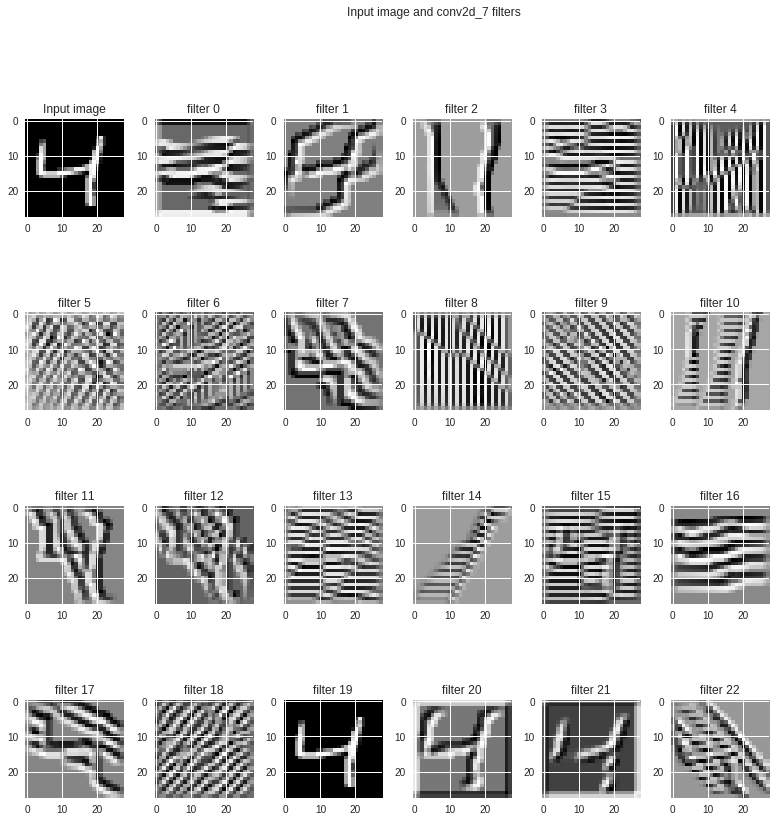

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()